# Plot validators novsl and vsl
Testing pkl files and plotting various things together.

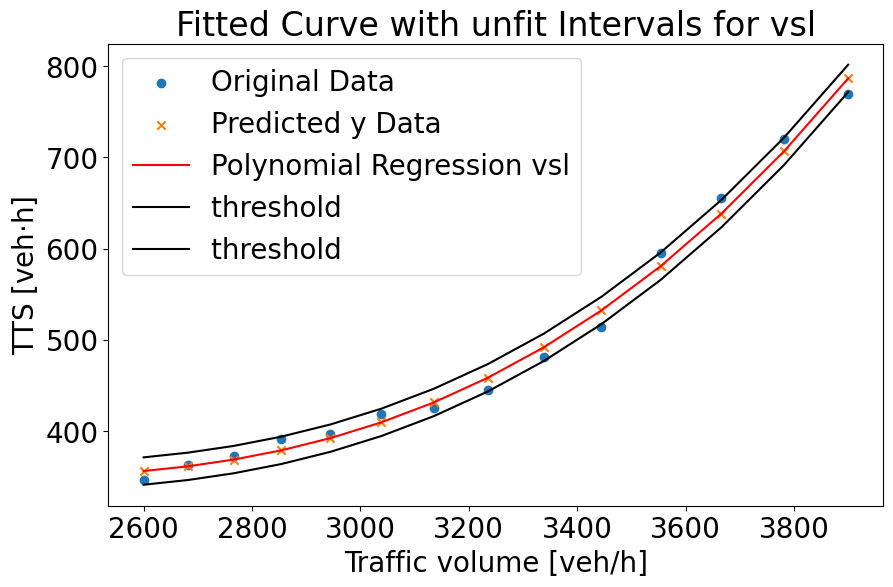

In [39]:

import matplotlib
from global_settings import vfs
import pickle
plt.figure(figsize=(10, 6))
# vsl = validator_controller_vsl
# nvsl = validator_controller_novsl

# Uncomment to read the validator_controller object from file to plot curves
vsl = pickle.load(open("vc_novsl_loop-1-20240604-141805.pkl", "rb"))
# nvsl = pickle.load(open("vc_vsl_loop-3-20240602-230447.pkl", "rb"))

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

# Plot for vsl
#for controller in [validator_controller_vsl,validator_controller_novsl]:
# controller= validator_controller_novsl
#    print(f"X values and Y values {controller.x_values}{controller.y_values} predicted values {controller.predicted_values}")
#    plt.scatter(controller.x_values, controller.y_values, label=f'Original Data ')
#    plt.scatter(controller.x_values, controller.predicted_values, label=f'Predicted y Data ', marker='x')
#    plt.plot(controller.fitted_curve[2], controller.fitted_curve[1], color='red', label=f'Polynomial Regression')
#    plt.plot(controller.fitted_curve[2], controller.fitted_curve[1] + vfs["threshold_y_fitting"], color='black', label=f'threshold ')
#    plt.plot(controller.fitted_curve[2], controller.fitted_curve[1] - vfs["threshold_y_fitting"], color='black', label=f'threshold ')

plt.scatter(vsl.x_values, vsl.y_values, label=f'Original Data ')
plt.scatter(vsl.x_values, vsl.predicted_values, label=f'Predicted y Data ', marker='x')
plt.plot(vsl.fitted_curve[2], vsl.fitted_curve[1], color='red', label=f'Polynomial Regression vsl')
plt.plot(vsl.fitted_curve[2], vsl.fitted_curve[1] + vfs["threshold_y_fitting"], color='black', label=f'threshold ')
plt.plot(vsl.fitted_curve[2], vsl.fitted_curve[1] - vfs["threshold_y_fitting"], color='black', label=f'threshold ')

# plt.scatter(nvsl.x_values, nvsl.y_values, label=f'Original Data ')
# plt.scatter(nvsl.x_values, nvsl.predicted_values, label=f'Predicted y Data ', marker='x')
# plt.plot(nvsl.fitted_curve[2], nvsl.fitted_curve[1], color='blue', label=f'Polynomial Regression novsl')
#plt.plot(nvsl.fitted_curve[2], nvsl.fitted_curve[1] + vfs["threshold_y_fitting"], color='black', label=f'threshold ')
#plt.plot(nvsl.fitted_curve[2], nvsl.fitted_curve[1] - vfs["threshold_y_fitting"], color='black', label=f'threshold ')

for start, end in vsl.unfit_interval:
    plt.axvspan(start, end, color='orange',alpha=0.3, label='unfit Interval')

plt.xlabel('Traffic volume')
plt.ylabel('TTS')
plt.title('Fitted Curves of vsl and novsl')
plt.xlabel('Traffic volume [veh/h]')
plt.ylabel('TTS [veh$\cdot$h]')
plt.title(f'Fitted Curve with unfit Intervals for vsl')
plt.legend()
#plt.show()
plt.savefig(f"test.pdf", format='pdf')

# Overall figure of the final function

In [53]:
# Load the pickle files for threshold 15
vsl_total = pickle.load(open("logger-vsl.pkl", "rb"))
novsl_total = pickle.load(open("logger-novsl.pkl", "rb"))

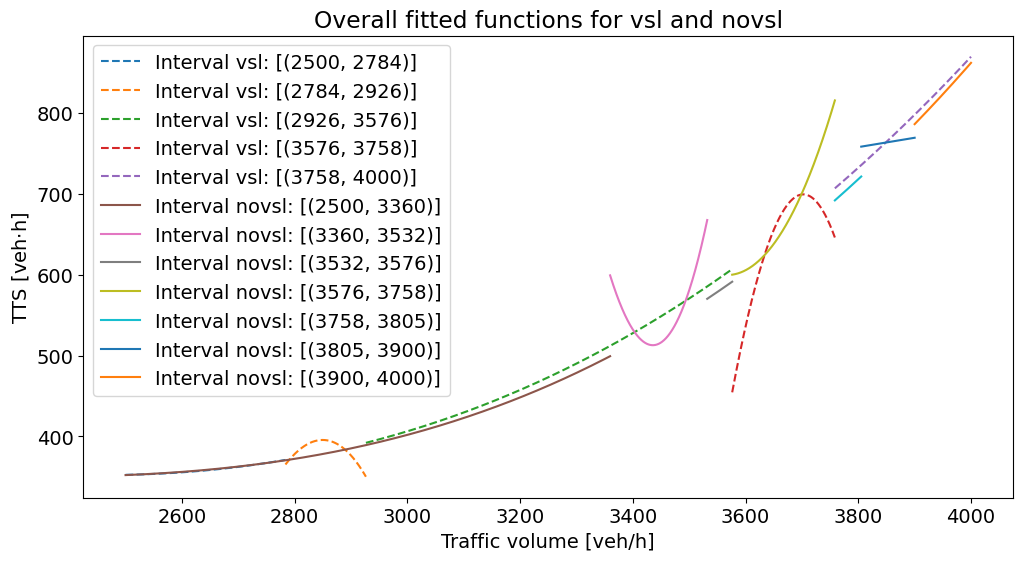

In [65]:
import re

import matplotlib.pyplot as plt
import numpy as np
import datetime
timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# Set font for the figure
plt.rcParams.update({'font.size': 14})

_, ax = plt.subplots(figsize=(12, 6))

    
# Create graph for vsl
for element in vsl_total:
    interval = element['interval']
    fitting_function_str = element['fitting_function']

    # Convert the string into a function
    terms = re.findall(
        r'([+-]?\s*\d+\.?\d*(?:e[+-]?\d+)?)(x\^\d+)?', fitting_function_str.replace(' ', ''))
    coefficients = [0] * 10  # Initialize a list of 10 zeros
    for term in terms:
        coef = float(term[0])
        if term[1]:  # If there is an 'x' term
            exponent = int(term[1][2:])  # Get the exponent
            while len(coefficients) <= exponent:  # Expand the list if needed
                coefficients.append(0)
            # Assign the coefficient to the corresponding position in the list
            coefficients[exponent] = coef
        else:  # If there is no 'x' term, it's the constant term
            coefficients[0] = coef
    # Reverse the list to match the order expected by np.poly1d
    fitting_function = np.poly1d(coefficients[::-1])

    # Adjust the number of points as needed
    x = np.linspace(interval[0], interval[1], 400)
    y = fitting_function(x)
    ax.plot(x, y, '--',label=f'Interval vsl: [{round(interval[0]), round(interval[1])}]')
    #plt.ylim([-100, 100])
    # ax.set_xticks(np.arange(*ax.get_xlim(),(ax.get_xlim()[1] - ax.get_xlim()[0]) / 20))
    
# Create the graph for novsl
for element in novsl_total:
    interval = element['interval']
    fitting_function_str = element['fitting_function']

    # Convert the string into a function
    terms = re.findall(
        r'([+-]?\s*\d+\.?\d*(?:e[+-]?\d+)?)(x\^\d+)?', fitting_function_str.replace(' ', ''))
    coefficients = [0] * 10  # Initialize a list of 10 zeros
    for term in terms:
        coef = float(term[0])
        if term[1]:  # If there is an 'x' term
            exponent = int(term[1][2:])  # Get the exponent
            while len(coefficients) <= exponent:  # Expand the list if needed
                coefficients.append(0)
            # Assign the coefficient to the corresponding position in the list
            coefficients[exponent] = coef
        else:  # If there is no 'x' term, it's the constant term
            coefficients[0] = coef
    # Reverse the list to match the order expected by np.poly1d
    fitting_function = np.poly1d(coefficients[::-1])

    # Adjust the number of points as needed
    x = np.linspace(interval[0], interval[1], 400)
    y = fitting_function(x)
    ax.plot(x, y, '-',label=f'Interval novsl: [{round(interval[0]), round(interval[1])}]')
    #plt.ylim([-100, 100])
    # ax.set_xticks(np.arange(*ax.get_xlim(),(ax.get_xlim()[1] - ax.get_xlim()[0]) / 20))

# for element in remaining_unfit_intervals:
#     ax.axvspan(*element['interval'], color='gray',
#                alpha=0.3, label='unfit Interval')
plt.title("Overall fitted functions for vsl and novsl")
plt.xlabel('Traffic volume [veh/h]')
plt.ylabel('TTS [veh$\cdot$h]')
plt.legend()
plt.savefig(f"Total_fitted_functions-{timestamp}.pdf", format='pdf')

In [66]:
vsl_total

[{'interval': [2500, 2783.69231],
  'fitting_function': 'y =  3.2466809109070796e-08x^3  -7.118355499122244e-05x^2  -0.23929414697376558x^1 + 888.3401680639654',
  'fit_points': [(2600.0, 346.13889),
   (2681.53846, 361.94444),
   (2766.15385, 372.5)]},
 {'interval': [2783.69231, 2926.46154],
  'fitting_function': 'y =  -1.3122899093893992e-17x^6  -1.2770545898277334e-16x^5 + 6.358086644578345e-11x^4 + 2.4285497450838745e-07x^3 + 0.0005247904533349774x^2 + 0.04548092502199785x^1  -6756.838058283177',
  'fit_points': [(2800.0, 378.27778),
   (2853.84615, 395.55556),
   (2875.0, 390.90278)]},
 {'interval': [2926.46154, 3576.30769],
  'fitting_function': 'y =  3.2466809109070796e-08x^3  -7.118355499122244e-05x^2  -0.23929414697376558x^1 + 888.3401680639654',
  'fit_points': [(2944.61538, 400.51389),
   (3038.46154, 415.47222),
   (3135.38462, 429.73611),
   (3235.38462, 454.18056),
   (3338.46154, 503.125),
   (3444.61538, 546.125),
   (3553.84615, 584.81944)]},
 {'interval': [3576.30769,

In [67]:
novsl_total

[{'interval': [2500, 3359.69231],
  'fitting_function': 'y =  6.483060326935743e-08x^3  -0.0003752502264880795x^2 + 0.688549434073736x^1  -36.83818677821555',
  'fit_points': [(2600.0, 346.13889),
   (2681.53846, 362.68056),
   (2766.15385, 372.5),
   (2853.84615, 391.30556),
   (2944.61538, 396.61111),
   (3038.46154, 418.16667),
   (3135.38462, 425.08333),
   (3235.38462, 444.5),
   (3338.46154, 481.09722)]},
 {'interval': [3359.69231, 3532.0],
  'fitting_function': 'y =  1.3443208198226033e-17x^6 + 6.167965995956142e-17x^5  -9.531647546708423e-11x^4  -4.374572566426081e-07x^3  -0.0011255736007471362x^2 + 0.038606724560384165x^1 + 22548.92270511722',
  'fit_points': [(3400.0, 532.40278),
   (3444.61538, 514.30556),
   (3475.0, 538.11111)]},
 {'interval': [3532.0, 3576.30769],
  'fitting_function': 'y =  6.483060326935743e-08x^3  -0.0003752502264880795x^2 + 0.688549434073736x^1  -36.83818677821555',
  'fit_points': [(3553.84615, 595.33333)]},
 {'interval': [3576.30769, 3758.46154],
  